<a href="https://colab.research.google.com/github/hei1sme/MAI391_project/blob/main/notebook/MAI391_SE194127_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dự đoán nghỉ việc của nhân viên bằng Logistic Regression**


### **Giới thiệu**

#### **Mô tả bài toán**
Dự án này nhằm xây dựng một mô hình Hồi quy Logistic để dự đoán khả năng nghỉ việc của nhân viên dựa trên các đặc điểm nhân khẩu học, tài chính và công việc, bao gồm tuổi tác, mức lương, khoảng cách từ nhà đến nơi làm việc, thâm niên tại công ty, mức độ hài lòng, và các yếu tố khác.

#### **Mục tiêu**
Phát triển một mô hình dự báo chính xác biến mục tiêu Attrition (nghỉ việc hoặc không), từ đó hỗ trợ doanh nghiệp trong việc đưa ra các chiến lược giữ chân nhân sự hiệu quả.

#### **Dữ liệu và phương pháp**
- **Dữ liệu sử dụng:** Tập dữ liệu [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data) từ Kaggle, bao gồm thông tin chi tiết về nhân viên và trạng thái nghỉ việc.
- **Phương pháp tiếp cận:** Áp dụng Hồi quy Logistic – một thuật toán phân loại nhị phân phổ biến và phù hợp với bài toán này.

#### **Lý do lựa chọn Hồi quy Logistic**
1. **Tính đơn giản và hiệu quả:** Hồi quy Logistic là một trong những mô hình phân loại nhị phân tiêu chuẩn, dễ triển khai và có hiệu suất tốt với các tập dữ liệu vừa và nhỏ.

2. **Dễ dàng diễn giải kết quả:** Các hệ số của mô hình có thể được sử dụng để đánh giá tác động của từng biến độc lập lên xác suất nghỉ việc của nhân viên.

3. **Khả năng tổng quát hóa tốt:** Hồi quy Logistic có thể hoạt động hiệu quả ngay cả khi tập dữ liệu không quá lớn, giúp tránh tình trạng overfitting so với các mô hình phức tạp hơn.

4. **Ứng dụng thực tế trong lĩnh vực nhân sự:** Mô hình này đã được sử dụng rộng rãi trong phân tích dữ liệu nhân sự để dự đoán xu hướng nghỉ việc và đề xuất các biện pháp can thiệp kịp thời.

Mô hình này sẽ được đánh giá dựa trên các thước đo phổ biến như Accuracy, Precision, Recall, F1-score, và sẽ được trực quan hóa thông qua Confusion Matrix, đường ROC và AUC để đảm bảo hiệu suất và tính chính xác.

## ***Nhập Thư Viện***

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

## ***Nhập Dataset***

In [3]:
# Đọc dữ liệu từ dataset đã upload lên github
url = "https://raw.githubusercontent.com/hei1sme/MAI391_project/refs/heads/main/data/HR-Employee-Attrition.csv"
df = pd.read_csv(url)

# Kiểm tra số dòng và số cột
print(f"Dataset có {df.shape[0]} dòng và {df.shape[1]} cột")

# Xem 5 dòng đầu tiên
df.head()

Dataset có 1470 dòng và 35 cột


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## ***Khám Phá Dữ Liệu***

### Kiểm Tra Thông Tin Dữ Liệu

In [ ]:
print("Kích thước dữ liệu:", df.shape)

Kích thước dữ liệu: (1470, 35)


In [ ]:
print("\n Thông tin dữ liệu:")
df.info()


 Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Job

In [ ]:
print("\n Số lượng giá trị thiếu trong từng cột:")
df.isnull().sum()


 Số lượng giá trị thiếu trong từng cột:


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
print("\nThống kê mô tả cho các biến số:")
df.describe()


Thống kê mô tả cho các biến số:


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Hiển thị số lượng giá trị duy nhất trong mỗi cột
print("\nSố lượng giá trị duy nhất trong mỗi cột:")
for column in df.columns:
    print(f"- {column}: {df[column].nunique()} giá trị duy nhất")


Số lượng giá trị duy nhất trong mỗi cột:
- Age: 43 giá trị duy nhất
- Attrition: 2 giá trị duy nhất
- BusinessTravel: 3 giá trị duy nhất
- DailyRate: 886 giá trị duy nhất
- Department: 3 giá trị duy nhất
- DistanceFromHome: 29 giá trị duy nhất
- Education: 5 giá trị duy nhất
- EducationField: 6 giá trị duy nhất
- EmployeeCount: 1 giá trị duy nhất
- EmployeeNumber: 1470 giá trị duy nhất
- EnvironmentSatisfaction: 4 giá trị duy nhất
- Gender: 2 giá trị duy nhất
- HourlyRate: 71 giá trị duy nhất
- JobInvolvement: 4 giá trị duy nhất
- JobLevel: 5 giá trị duy nhất
- JobRole: 9 giá trị duy nhất
- JobSatisfaction: 4 giá trị duy nhất
- MaritalStatus: 3 giá trị duy nhất
- MonthlyIncome: 1349 giá trị duy nhất
- MonthlyRate: 1427 giá trị duy nhất
- NumCompaniesWorked: 10 giá trị duy nhất
- Over18: 1 giá trị duy nhất
- OverTime: 2 giá trị duy nhất
- PercentSalaryHike: 15 giá trị duy nhất
- PerformanceRating: 2 giá trị duy nhất
- RelationshipSatisfaction: 4 giá trị duy nhất
- StandardHours: 1 giá 

### Kiểm tra phân phối dữ liệu


Phân bố của biến mục tiêu (Attrition):
Attrition
No     1233
Yes     237
Name: count, dtype: int64
Tỷ lệ nhân viên nghỉ việc: 16.12%



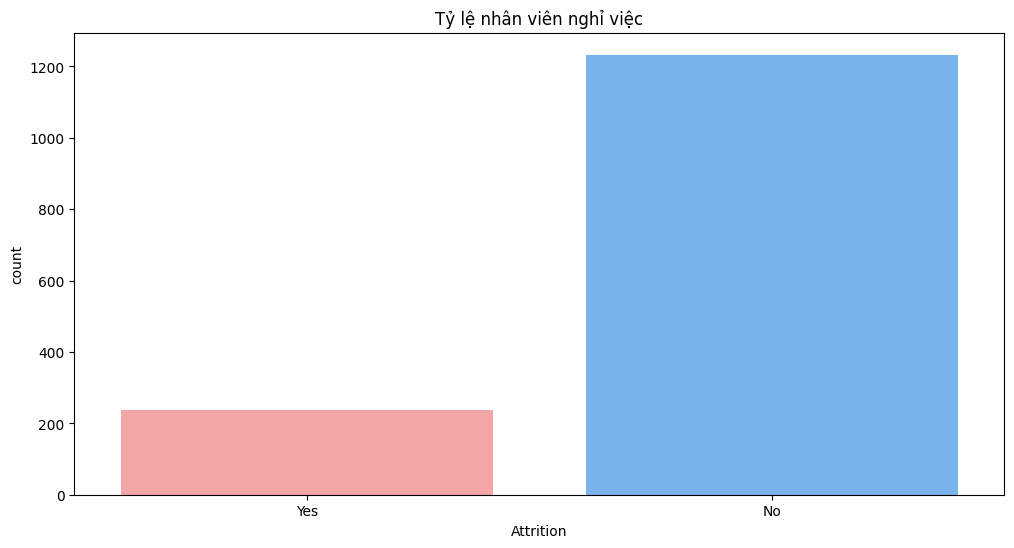

In [ ]:
print("\nPhân bố của biến mục tiêu (Attrition):")
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)
print(f"Tỷ lệ nhân viên nghỉ việc: {attrition_counts['Yes'] / len(df) * 100:.2f}%\n")

# Kiểm tra phân bố của biến mục tiêu
plt.figure(figsize=(12, 6))
sns.countplot(x="Attrition", data=df, palette=["#ff9999", "#66b3ff"])
plt.title("Tỷ lệ nhân viên nghỉ việc")
plt.show()

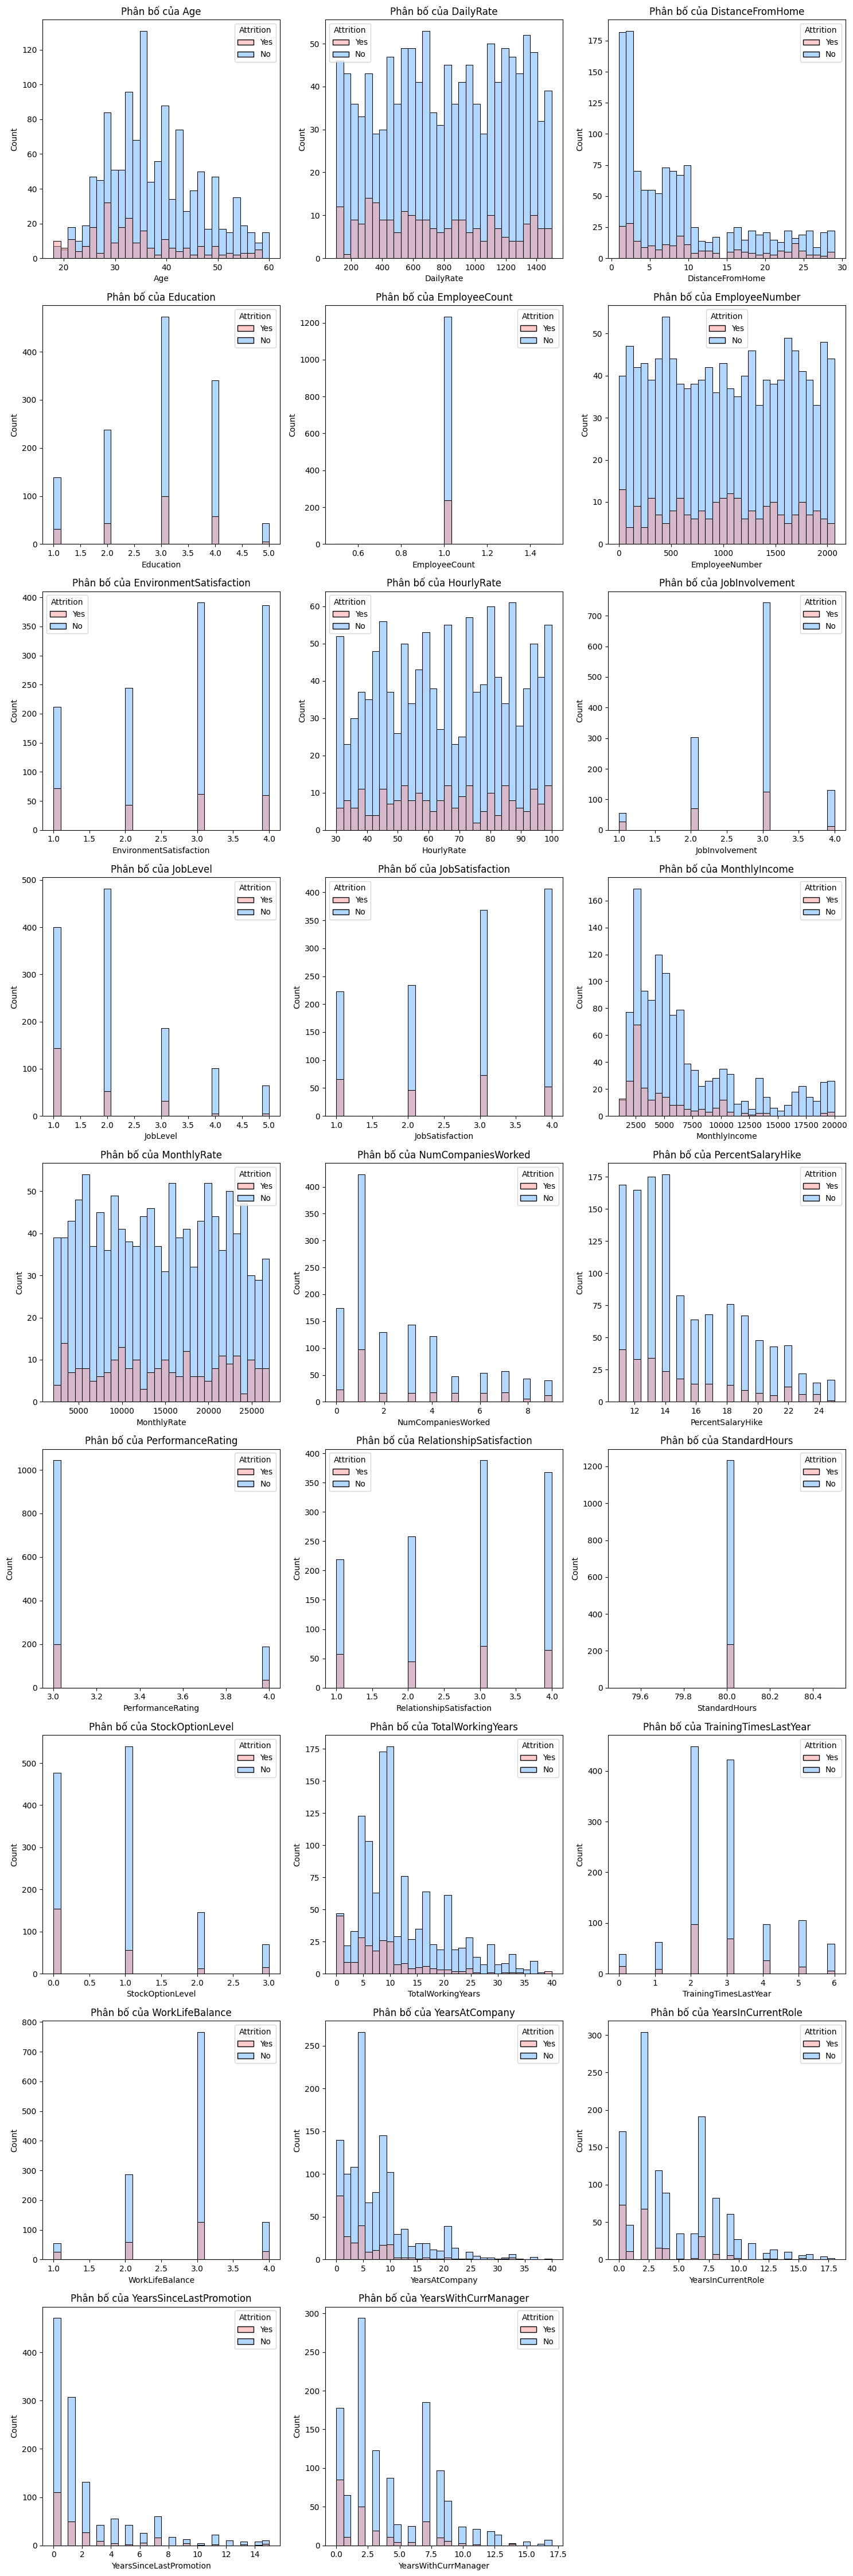

In [ ]:
# Phân tích các biến số
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df, x=col, hue='Attrition', bins=30, kde=False, palette=["#ff9999", "#66b3ff"])
    plt.title(f'Phân bố của {col}')
plt.tight_layout()
plt.show()

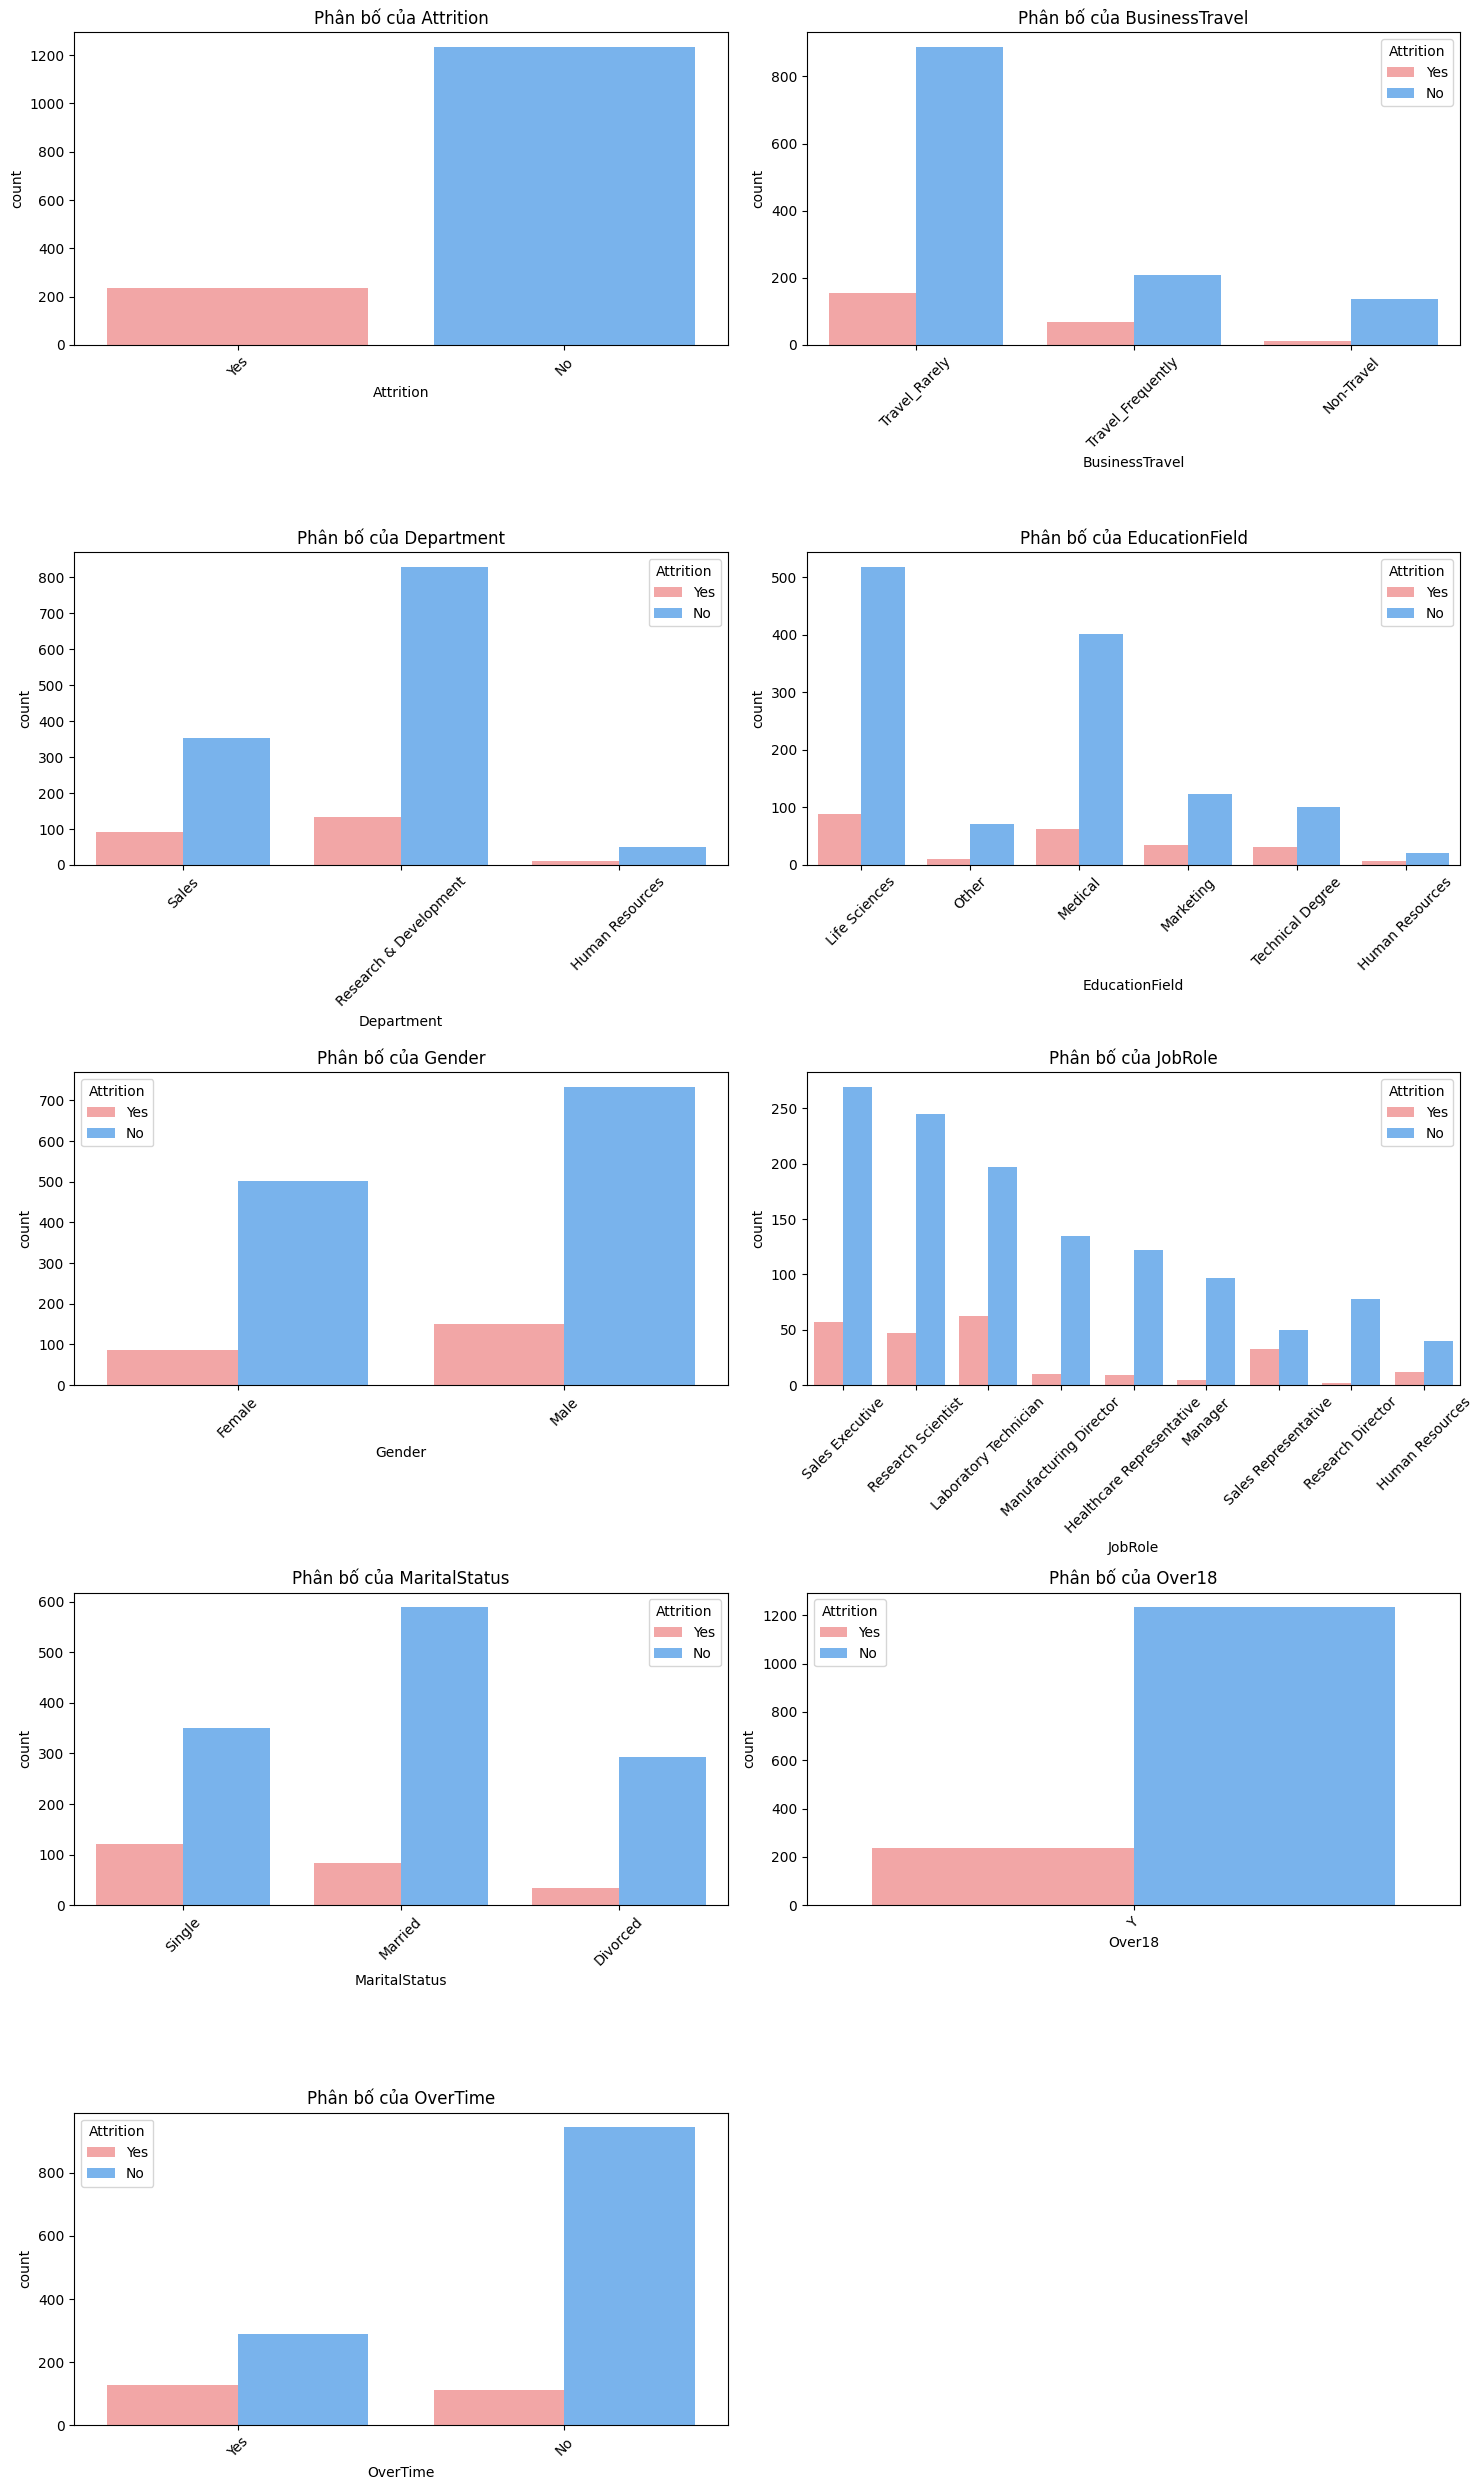

In [ ]:
# Phân tích các biến phân loại
categorical_cols = df.select_dtypes(include=['object']).columns
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, hue='Attrition', palette=["#ff9999", "#66b3ff"])
    plt.xticks(rotation=45)
    plt.title(f'Phân bố của {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Phân tích tương quan
# Chuyển đổi biến phân loại thành số cho phân tích tương quan
df_numeric = df.copy()
categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
                'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Over18']
label_encoder = LabelEncoder()
for col in categorical_cols:
    if col in df_numeric.columns:
        df_numeric[col] = label_encoder.fit_transform(df_numeric[col])

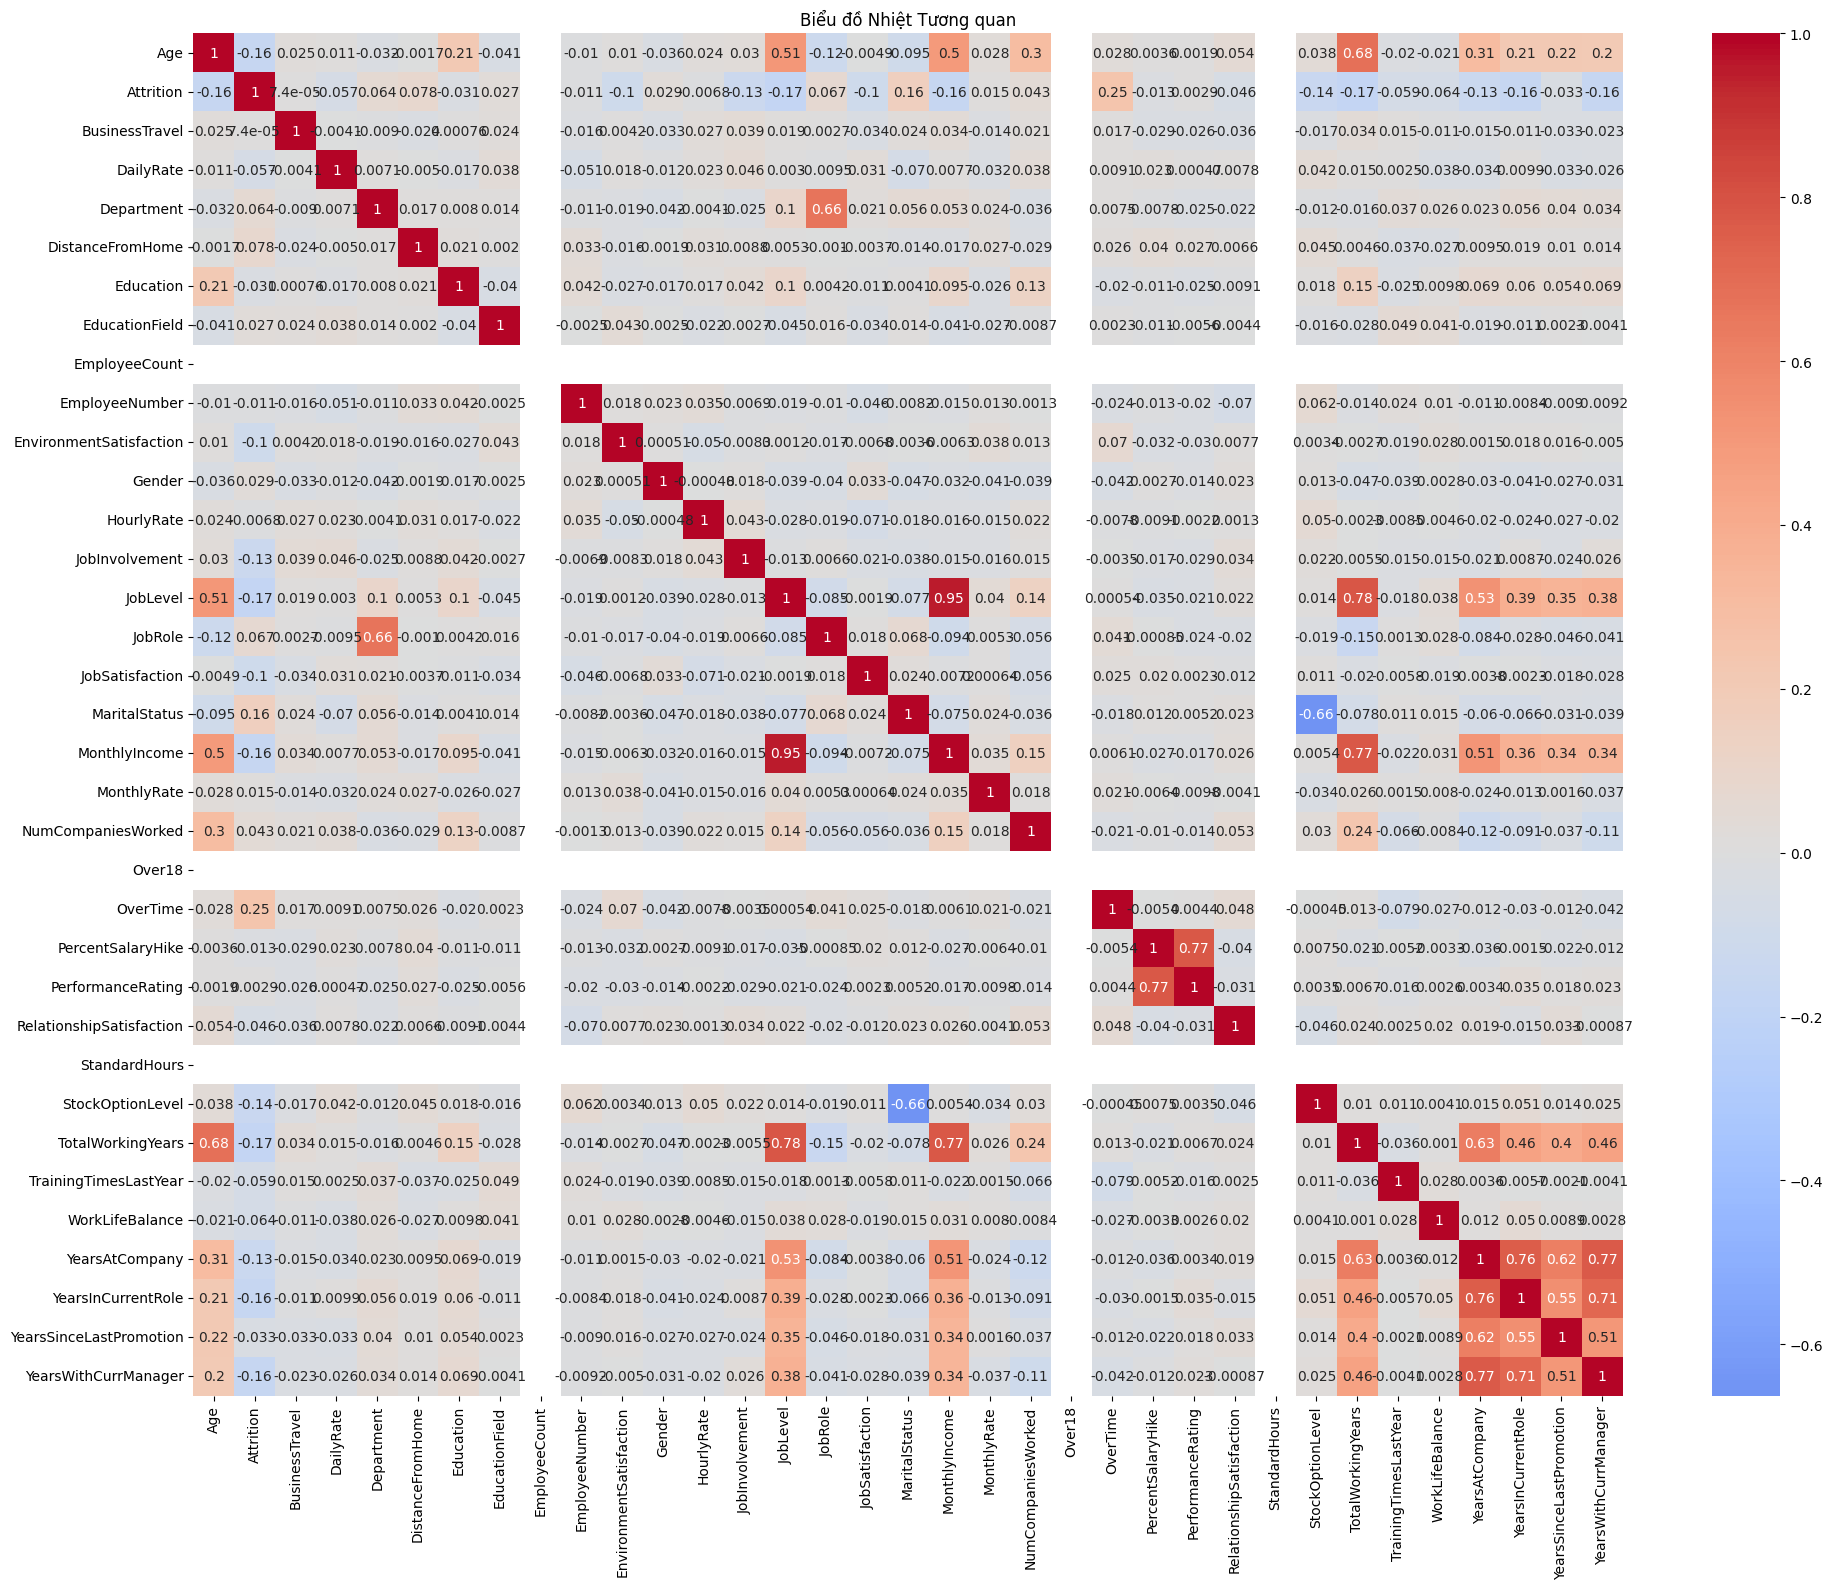

In [ ]:
# Tính ma trận tương quan
correlation_matrix = df_numeric.corr()

# Vẽ biểu đồ nhiệt tương quan
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Biểu đồ Nhiệt Tương quan')
plt.tight_layout()
plt.show()

In [ ]:
# Kiểm định Chi-square cho các biến phân loại
print("\n=== KẾT QUẢ KIỂM ĐỊNH CHI-SQUARE ===")
chi_square_results = []
for col in categorical_cols:
    if col != 'Attrition' and col in df.columns:  # Kiểm tra xem cột có tồn tại không
        contingency_table = pd.crosstab(df['Attrition'], df[col])
        chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        chi_square_results.append({
            'Bien': col,
            'Chi-square': chi2,
            'p-value': p_value,
            'Bac_tu_do': dof
        })
        print(f"\nBiến: {col}")
        print(f"Chi-square: {chi2:.4f}")
        print(f"p-value: {p_value:.4f}")
        print(f"Bậc tự do: {dof}")
        print(f"Có ý nghĩa thống kê: {'Có' if p_value < 0.05 else 'Không'}")


=== KẾT QUẢ KIỂM ĐỊNH CHI-SQUARE ===

Biến: BusinessTravel
Chi-square: 24.1824
p-value: 0.0000
Bậc tự do: 2
Có ý nghĩa thống kê: Có

Biến: Department
Chi-square: 10.7960
p-value: 0.0045
Bậc tự do: 2
Có ý nghĩa thống kê: Có

Biến: EducationField
Chi-square: 16.0247
p-value: 0.0068
Bậc tự do: 5
Có ý nghĩa thống kê: Có

Biến: Gender
Chi-square: 1.1170
p-value: 0.2906
Bậc tự do: 1
Có ý nghĩa thống kê: Không

Biến: JobRole
Chi-square: 86.1903
p-value: 0.0000
Bậc tự do: 8
Có ý nghĩa thống kê: Có

Biến: MaritalStatus
Chi-square: 46.1637
p-value: 0.0000
Bậc tự do: 2
Có ý nghĩa thống kê: Có

Biến: OverTime
Chi-square: 87.5643
p-value: 0.0000
Bậc tự do: 1
Có ý nghĩa thống kê: Có

Biến: Over18
Chi-square: 0.0000
p-value: 1.0000
Bậc tự do: 0
Có ý nghĩa thống kê: Không


In [ ]:
# Phân tích VIF
print("\n=== KẾT QUẢ PHÂN TÍCH VIF ===")
# Chuẩn bị dữ liệu cho VIF
X = df_numeric.drop('Attrition', axis=1)
vif_data = pd.DataFrame()
vif_data["Bien"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# In kết quả VIF
print("\nCác biến có VIF cao (có thể gây đa cộng tuyến):")
for _, row in vif_data.iterrows():
    print(f"{row['Bien']}: {row['VIF']:.2f}")
    if row['VIF'] > 5:
        print(f"  ⚠️ Cảnh báo: VIF > 5, có thể gây đa cộng tuyến")


=== KẾT QUẢ PHÂN TÍCH VIF ===

Các biến có VIF cao (có thể gây đa cộng tuyến):
Age: 2.05
BusinessTravel: 1.02
DailyRate: 1.03
Department: 1.94
DistanceFromHome: 1.02
Education: 1.07
EducationField: 1.02
EmployeeCount: 0.00
EmployeeNumber: 1.02
EnvironmentSatisfaction: 1.02
Gender: 1.02
HourlyRate: 1.02
JobInvolvement: 1.02
JobLevel: 11.83
  ⚠️ Cảnh báo: VIF > 5, có thể gây đa cộng tuyến
JobRole: 1.89
JobSatisfaction: 1.02
MaritalStatus: 1.84
MonthlyIncome: 11.06
  ⚠️ Cảnh báo: VIF > 5, có thể gây đa cộng tuyến
MonthlyRate: 1.02
NumCompaniesWorked: 1.26
Over18: nan
OverTime: 1.03
PercentSalaryHike: 2.52
PerformanceRating: 2.52
RelationshipSatisfaction: 1.03
StandardHours: 0.00
StockOptionLevel: 1.83
TotalWorkingYears: 4.82
TrainingTimesLastYear: 1.02
WorkLifeBalance: 1.02
YearsAtCompany: 4.60
YearsInCurrentRole: 2.73
YearsSinceLastPromotion: 1.68
YearsWithCurrManager: 2.78


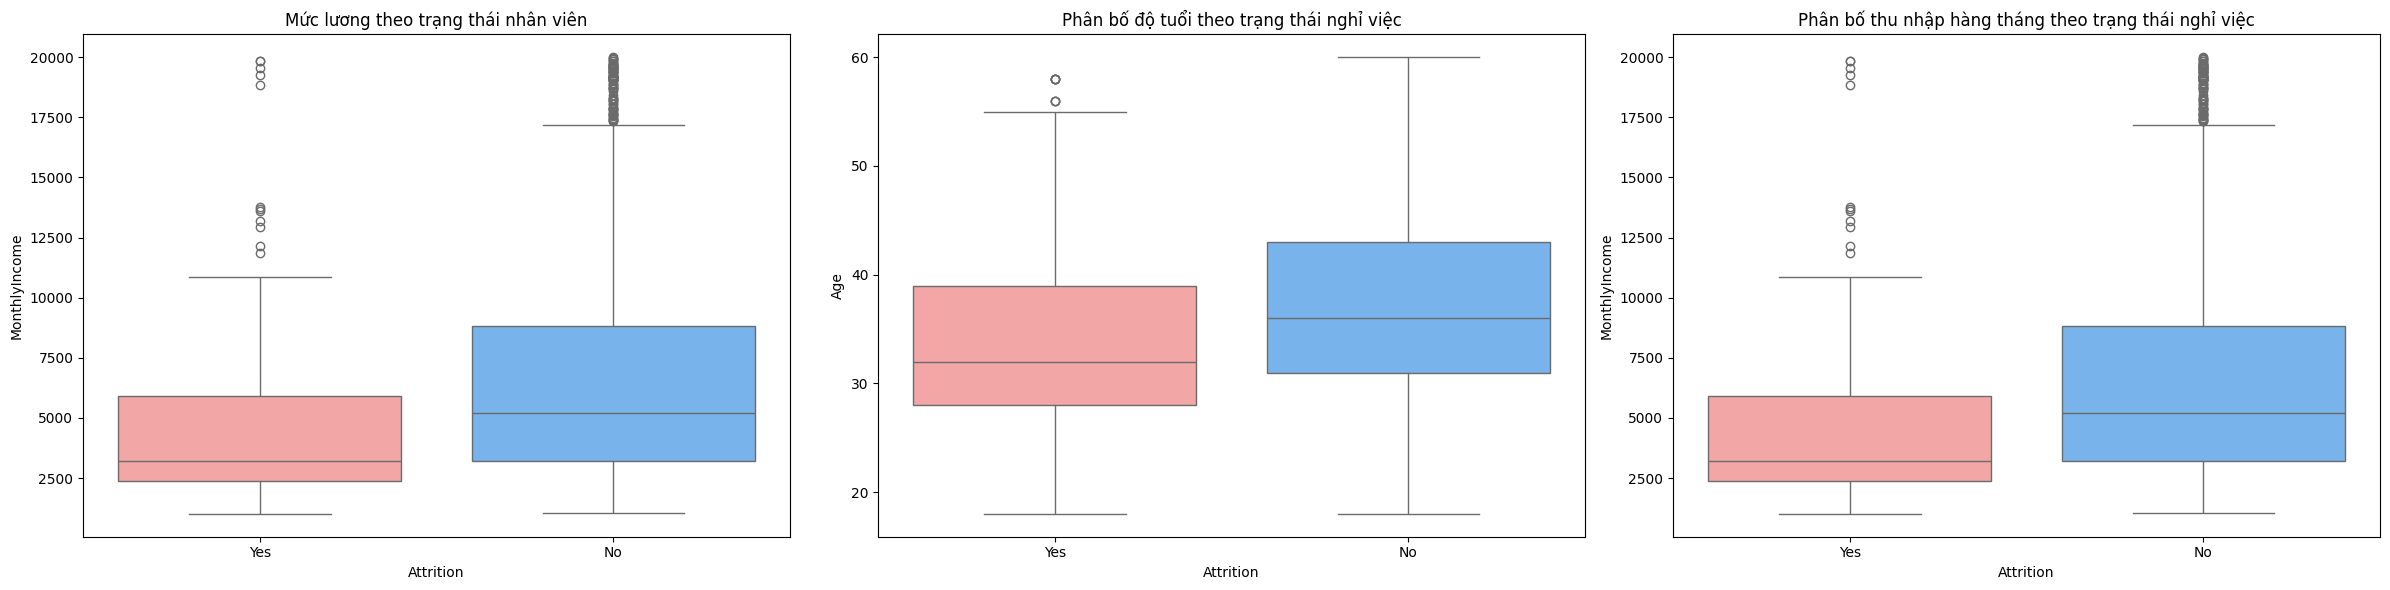

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))  # 1 hàng, 4 cột

# Biểu đồ 1: Hộp phân tích Mức lương hàng tháng theo trạng thái nghỉ việc
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, palette=["#ff9999", "#66b3ff"], ax=axes[0])
axes[0].set_title("Mức lương theo trạng thái nhân viên")

# Biểu đồ 2: Hộp phân tích phân bố độ tuổi theo trạng thái nghỉ việc
sns.boxplot(x="Attrition", y="Age", data=df, palette=["#ff9999", "#66b3ff"], ax=axes[1])
axes[1].set_title("Phân bố độ tuổi theo trạng thái nghỉ việc")

# Biểu đồ 3: Hộp phân tích Thu nhập hàng tháng theo trạng thái nghỉ việc
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, palette=["#ff9999", "#66b3ff"], ax=axes[2])
axes[2].set_title("Phân bố thu nhập hàng tháng theo trạng thái nghỉ việc")

# Điều chỉnh bố cục để đảm bảo không bị chồng lấn
plt.tight_layout()
plt.show()


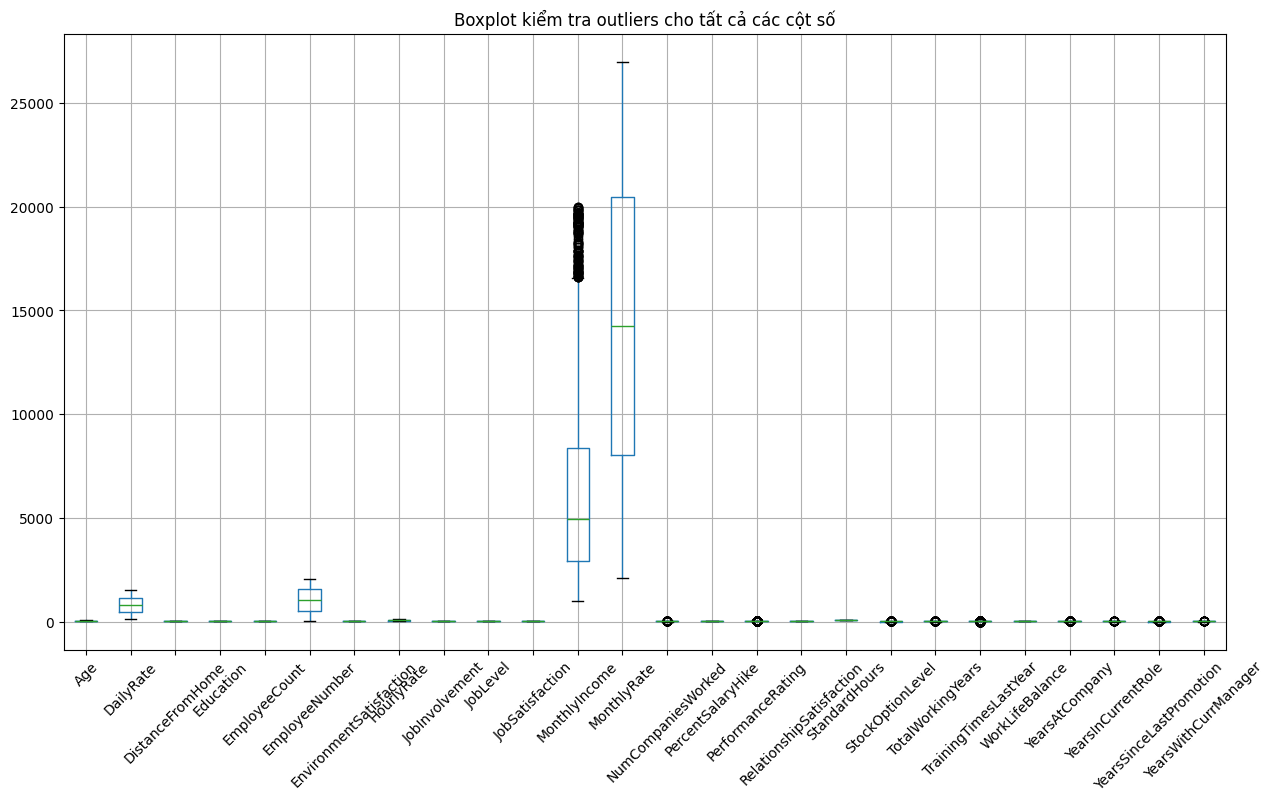

Số lượng outliers theo IQR (tất cả các cột số):
Age                           0
DailyRate                     0
DistanceFromHome              0
Education                     0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobSatisfaction               0
MonthlyIncome               114
MonthlyRate                   0
NumCompaniesWorked           52
PercentSalaryHike             0
PerformanceRating           226
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel             85
TotalWorkingYears            63
TrainingTimesLastYear       238
WorkLifeBalance               0
YearsAtCompany              104
YearsInCurrentRole           21
YearsSinceLastPromotion     107
YearsWithCurrManager         14
dtype: int64

Số lượng outliers theo Z-score (tất cả các cột số):
Age                          0
DailyRate              

In [ ]:
# Tự động chọn tất cả các cột số
numerical_columns = df.select_dtypes(include=['number']).columns

# Vẽ boxplot để kiểm tra outliers cho tất cả các cột số
plt.figure(figsize=(15, 8))
df[numerical_columns].boxplot(rot=45)
plt.title("Boxplot kiểm tra outliers cho tất cả các cột số")
plt.show()

# Kiểm tra outliers bằng IQR
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

print("Số lượng outliers theo IQR (tất cả các cột số):")
print(outliers_iqr)

# Kiểm tra outliers bằng Z-score
z_scores = np.abs(zscore(df[numerical_columns]))
outliers_zscore = (z_scores > 3).sum(axis=0)

print("\nSố lượng outliers theo Z-score (tất cả các cột số):")
print(outliers_zscore)


## ***Tiền Xử Lý Dữ Liệu***

### Mã hóa biến mục tiêu

In [4]:
# Mã hóa biến mục tiêu
print("\n=== MÃ HÓA BIẾN MỤC TIÊU ===")
print("Giá trị duy nhất của Attrition trước mã hóa:", df['Attrition'].unique())
attrition_encoder = LabelEncoder()
df['Attrition'] = attrition_encoder.fit_transform(df['Attrition'])
print("Phân phối của biến Attrition sau mã hóa:")
print(df['Attrition'].value_counts(normalize=True))
print("Giá trị duy nhất của Attrition sau mã hóa:", df['Attrition'].unique())


=== MÃ HÓA BIẾN MỤC TIÊU ===
Giá trị duy nhất của Attrition trước mã hóa: ['Yes' 'No']
Phân phối của biến Attrition sau mã hóa:
Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64
Giá trị duy nhất của Attrition sau mã hóa: [1 0]


### Loại bỏ cột không cần thiết

In [5]:
# Loại bỏ các biến không cần thiết
print("\n=== LOẠI BỎ CÁC BIẾN KHÔNG CẦN THIẾT ===")
print("Các biến không có phương sai:")
print("- EmployeeCount (VIF = 0.00)")
print("- StandardHours (VIF = 0.00)")

print("\nCác biến không có ý nghĩa thống kê:")
print("- Over18 (p-value = 1.0000)")
print("- Gender (p-value = 0.2906)")

print("\nCác biến có VIF > 5:")
print("- JobLevel (VIF = 11.83)")
print("- MonthlyIncome (VIF = 11.06)")

print("\nCác biến không cần thiết khác:")
print("- EmployeeNumber (ID của nhân viên)")
print("- DailyRate, HourlyRate, MonthlyRate (thông tin lương trùng lặp)")

columns_to_drop = [
    'EmployeeCount', 'StandardHours', 'Over18', 'Gender',
    'JobLevel', 'MonthlyIncome', 'EmployeeNumber',
    'DailyRate', 'HourlyRate', 'MonthlyRate'
]
df = df.drop(columns=columns_to_drop)
print(f"\nĐã loại bỏ {len(columns_to_drop)} biến không cần thiết")
print(f"Kích thước dữ liệu sau khi loại bỏ: {df.shape}")
print("Các cột còn lại:", len(df.columns))
print(df.columns.tolist())


=== LOẠI BỎ CÁC BIẾN KHÔNG CẦN THIẾT ===
Các biến không có phương sai:
- EmployeeCount (VIF = 0.00)
- StandardHours (VIF = 0.00)

Các biến không có ý nghĩa thống kê:
- Over18 (p-value = 1.0000)
- Gender (p-value = 0.2906)

Các biến có VIF > 5:
- JobLevel (VIF = 11.83)
- MonthlyIncome (VIF = 11.06)

Các biến không cần thiết khác:
- EmployeeNumber (ID của nhân viên)
- DailyRate, HourlyRate, MonthlyRate (thông tin lương trùng lặp)

Đã loại bỏ 10 biến không cần thiết
Kích thước dữ liệu sau khi loại bỏ: (1470, 25)
Các cột còn lại: 25
['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCu

### Xử lý các biến phân loại

In [6]:
# Xử lý các biến phân loại
print("\n=== XỬ LÝ CÁC BIẾN PHÂN LOẠI ===")
categorical_columns = df.select_dtypes(include=['object']).columns
print("Các biến phân loại:", categorical_columns.tolist())

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
    print(f"Đã mã hóa biến {col}")

df.head()


=== XỬ LÝ CÁC BIẾN PHÂN LOẠI ===
Các biến phân loại: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']
Đã mã hóa biến BusinessTravel
Đã mã hóa biến Department
Đã mã hóa biến EducationField
Đã mã hóa biến JobRole
Đã mã hóa biến MaritalStatus
Đã mã hóa biến OverTime


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,1,2,3,7,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,1,8,1,1,3,2,6,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1,2,2,4,4,2,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1,3,4,1,4,3,6,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,1,2,1,3,1,3,2,...,3,4,1,6,3,3,2,2,2,2


###  Chia dữ liệu train/test

In [7]:
# Cell 7: Chia dữ liệu train/test
X = df.drop('Attrition', axis=1)
y = df['Attrition']

print("Số lượng cột trong X trước khi chia:", X.shape[1])
print("Các cột trong X:", len(X.columns))
print(X.columns.tolist())
print("Kiểm tra giá trị của y:", y.unique())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nKích thước sau khi chia:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")
print("Kiểm tra giá trị của y_train:", y_train.unique())
print("Kiểm tra giá trị của y_test:", y_test.unique())

Số lượng cột trong X trước khi chia: 24
Các cột trong X: 24
['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Kiểm tra giá trị của y: [1 0]

Kích thước sau khi chia:
X_train: (1176, 24)
X_test: (294, 24)
y_train: (1176,)
y_test: (294,)
Kiểm tra giá trị của y_train: [0 1]
Kiểm tra giá trị của y_test: [0 1]


### Xử lý Outlier

In [8]:
# Xử lý Outlier
def handle_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean[col] = df[col].clip(lower_bound, upper_bound)
    return df_clean

numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
print("\nCác biến số:", len(numeric_columns))
print(numeric_columns.tolist())

print("\nXử lý Outlier cho các biến số:")
for col in numeric_columns:
    outliers_train = len(X_train[X_train[col] > X_train[col].quantile(0.75) + 1.5 * (X_train[col].quantile(0.75) - X_train[col].quantile(0.25))]) + len(X_train[X_train[col] < X_train[col].quantile(0.25) - 1.5 * (X_train[col].quantile(0.75) - X_train[col].quantile(0.25))])
    print(f"Biến {col}: {outliers_train} outliers")

X_train = handle_outliers(X_train, numeric_columns)
X_test = handle_outliers(X_test, numeric_columns)


Các biến số: 24
['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Xử lý Outlier cho các biến số:
Biến Age: 0 outliers
Biến BusinessTravel: 0 outliers
Biến Department: 0 outliers
Biến DistanceFromHome: 0 outliers
Biến Education: 0 outliers
Biến EducationField: 0 outliers
Biến EnvironmentSatisfaction: 0 outliers
Biến JobInvolvement: 0 outliers
Biến JobRole: 0 outliers
Biến JobSatisfaction: 0 outliers
Biến MaritalStatus: 0 outliers
Biến NumCompaniesWorked: 43 outliers
Biến OverTime: 0 outliers
Biến PercentSalaryHike: 0 outliers
Biến PerformanceRating: 183 outliers
Biến Relationship

### Chuẩn hóa các biến số

In [9]:
# Chuẩn hóa biến số
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

### Xử lý dữ liệu imbalance

In [10]:
# Xử lý dữ liệu mất cân bằng
print("\n=== XỬ LÝ DỮ LIỆU MẤT CÂN BẰNG ===")
print("Phân phối của biến Attrition trong tập train:")
print(y_train.value_counts(normalize=True))
print("Loại dữ liệu của y_train:", type(y_train))
print("Giá trị duy nhất của y_train:", y_train.unique())

# Lưu lại cột trước khi SMOTE
X_train_columns = X_train.columns.tolist()
print("Số lượng cột trong X_train trước SMOTE:", len(X_train_columns))
print("Các cột trong X_train trước SMOTE:", X_train_columns)

# Chuyển đổi sang mảng numpy để SMOTE xử lý đúng
X_train_array = X_train.values
y_train_array = y_train.values

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_array, y_train_array)

# Đảm bảo cột không thay đổi sau SMOTE
X_train_balanced = pd.DataFrame(X_train_balanced, columns=X_train_columns)
print("Kích thước X_train_balanced sau SMOTE:", X_train_balanced.shape)
print("Số lượng cột trong X_train_balanced:", len(X_train_balanced.columns))

print("\nPhân phối của biến Attrition sau khi xử lý mất cân bằng:")
print(pd.Series(y_train_balanced).value_counts(normalize=True))


=== XỬ LÝ DỮ LIỆU MẤT CÂN BẰNG ===
Phân phối của biến Attrition trong tập train:
Attrition
0    0.831633
1    0.168367
Name: proportion, dtype: float64
Loại dữ liệu của y_train: <class 'pandas.core.series.Series'>
Giá trị duy nhất của y_train: [0 1]
Số lượng cột trong X_train trước SMOTE: 24
Các cột trong X_train trước SMOTE: ['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Kích thước X_train_balanced sau SMOTE: (1956, 24)
Số lượng cột trong X_train_balanced: 24

Phân phối của biến Attrition sau khi xử lý mất cân bằng:
0    0.5
1    0.5
Name: proportion, dtype: float64


In [11]:
print("\n=== THÔNG TIN TỔNG HỢP ===")
print("\nKích thước tập training:", X_train_balanced.shape)
print("Kích thước tập test:", X_test.shape)
print(f"Tổng số biến ban đầu: {df.shape[1] + len(columns_to_drop)}")
print(f"Số biến đã loại bỏ: {len(columns_to_drop)}")
print(f"Số biến còn lại: {df.shape[1]}")
print("\nCác biến được sử dụng trong mô hình:", len(X_train_balanced.columns))
for col in X_train_balanced.columns:
    print(f"- {col}")


=== THÔNG TIN TỔNG HỢP ===

Kích thước tập training: (1956, 24)
Kích thước tập test: (294, 24)
Tổng số biến ban đầu: 35
Số biến đã loại bỏ: 10
Số biến còn lại: 25

Các biến được sử dụng trong mô hình: 24
- Age
- BusinessTravel
- Department
- DistanceFromHome
- Education
- EducationField
- EnvironmentSatisfaction
- JobInvolvement
- JobRole
- JobSatisfaction
- MaritalStatus
- NumCompaniesWorked
- OverTime
- PercentSalaryHike
- PerformanceRating
- RelationshipSatisfaction
- StockOptionLevel
- TotalWorkingYears
- TrainingTimesLastYear
- WorkLifeBalance
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager


## ***Huấn luyện mô hình Logistic Regression***

### Huấn luyện mô hình

In [12]:
# Huấn luyện mô hình hồi quy logistic
model = LogisticRegression(random_state=42)

# Bắt đầu tính thời gian huấn luyện
start_time = time.time()

model.fit(X_train_balanced, y_train_balanced)

# Kết thúc tính thời gian huấn luyện
end_time = time.time()
training_time = end_time - start_time

# Dự đoán và đánh giá
print("\n=== ĐÁNH GIÁ MÔ HÌNH ===")
# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Thời gian huấn luyện: {training_time:.4f} s")
print(classification_report(y_test, y_pred))


=== ĐÁNH GIÁ MÔ HÌNH ===
Accuracy: 0.7211
Thời gian huấn luyện: 0.0223 s
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       255
           1       0.26      0.59      0.36        39

    accuracy                           0.72       294
   macro avg       0.59      0.67      0.59       294
weighted avg       0.83      0.72      0.76       294



#### Thực tế và Dự đoán


=== SO SÁNH GIÁ TRỊ THỰC TẾ VÀ DỰ ĐOÁN ===
Số lượng dự đoán đúng: 212
Số lượng dự đoán sai: 82


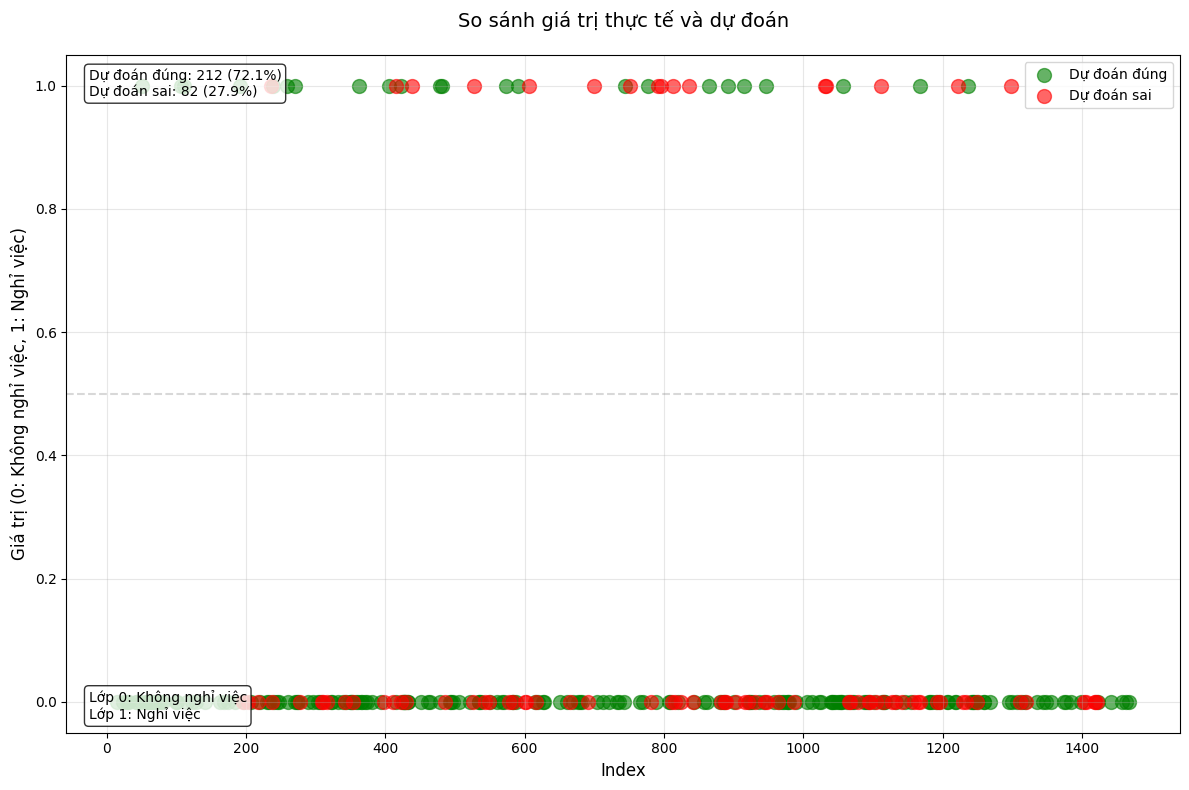

In [13]:
# So sánh giá trị thực tế và dự đoán
print("\n=== SO SÁNH GIÁ TRỊ THỰC TẾ VÀ DỰ ĐOÁN ===")
# Tạo DataFrame chứa giá trị thực tế và dự đoán
y_compare = pd.DataFrame({
    'Thực tế': y_test,
    'Dự đoán': y_pred,
})

# Thêm cột để đánh dấu dự đoán đúng/sai
y_compare['Dự đoán đúng'] = y_compare['Thực tế'] == y_compare['Dự đoán']

# Hiển thị số lượng dự đoán đúng và sai
correct_count = sum(y_compare['Dự đoán đúng'])
incorrect_count = sum(~y_compare['Dự đoán đúng'])
print(f"Số lượng dự đoán đúng: {correct_count}")
print(f"Số lượng dự đoán sai: {incorrect_count}")

# Vẽ biểu đồ phân tán
plt.figure(figsize=(12, 8))

# Vẽ các điểm dự đoán đúng (màu xanh)
plt.scatter(y_compare[y_compare['Dự đoán đúng']].index,
           y_compare[y_compare['Dự đoán đúng']]['Thực tế'],
           color='green', alpha=0.6, label='Dự đoán đúng', s=100)

# Vẽ các điểm dự đoán sai (màu đỏ)
plt.scatter(y_compare[~y_compare['Dự đoán đúng']].index,
           y_compare[~y_compare['Dự đoán đúng']]['Thực tế'],
           color='red', alpha=0.6, label='Dự đoán sai', s=100)

# Thêm đường ngang để phân biệt các lớp
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.3)

plt.title('So sánh giá trị thực tế và dự đoán', fontsize=14, pad=20)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Giá trị (0: Không nghỉ việc, 1: Nghỉ việc)', fontsize=12)
plt.legend(fontsize=10)

# Thêm chú thích về số lượng và tỷ lệ
total = correct_count + incorrect_count
accuracy = correct_count / total * 100
plt.text(0.02, 0.98,
         f'Dự đoán đúng: {correct_count} ({accuracy:.1f}%)\n'
         f'Dự đoán sai: {incorrect_count} ({100-accuracy:.1f}%)',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
         fontsize=10)

# Thêm chú thích về các lớp
plt.text(0.02, 0.02,
         'Lớp 0: Không nghỉ việc\nLớp 1: Nghỉ việc',
         transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
         fontsize=10)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Confusion Matrix

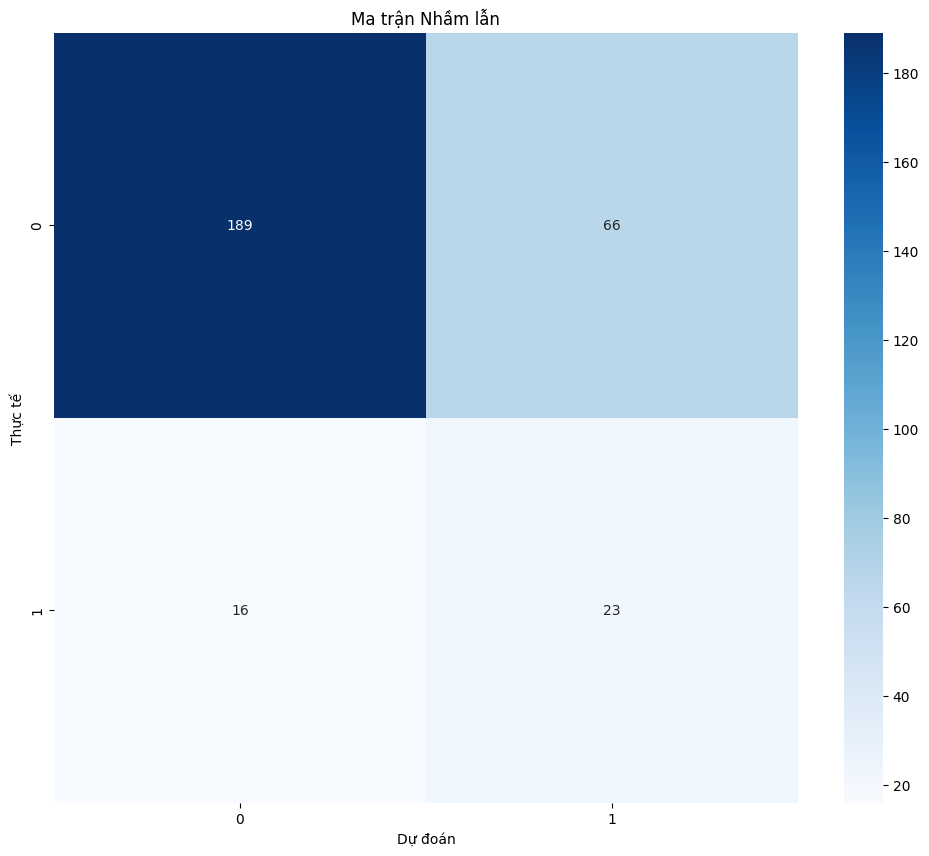

In [14]:
# Confusion Matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Ma trận Nhầm lẫn')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

#### ROC Curve

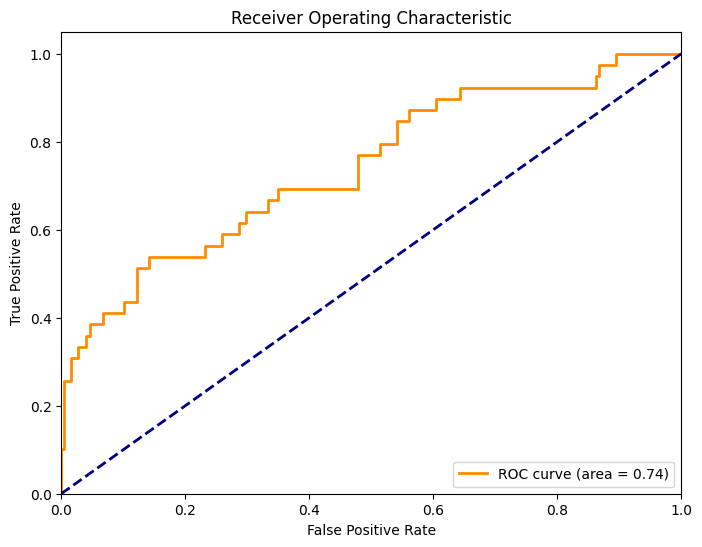

In [15]:
y_prob = model.predict_proba(X_test)[:, 1]

# Tính toán FPR, TPR và thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Tính toán AUC
roc_auc = auc(fpr, tpr)

# Vẽ đường ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### Đặc trưng quan trọng


=== PHÂN TÍCH TẦM QUAN TRỌNG CỦA ĐẶC TRƯNG ===

Top 10 đặc trưng quan trọng nhất:
                  Đặc trưng  Tầm quan trọng
12                 OverTime        0.902755
20           YearsAtCompany        0.814296
17        TotalWorkingYears        0.776000
21       YearsInCurrentRole        0.772681
23     YearsWithCurrManager        0.520036
10            MaritalStatus        0.439608
9           JobSatisfaction        0.411723
22  YearsSinceLastPromotion        0.403543
11       NumCompaniesWorked        0.398620
6   EnvironmentSatisfaction        0.360136


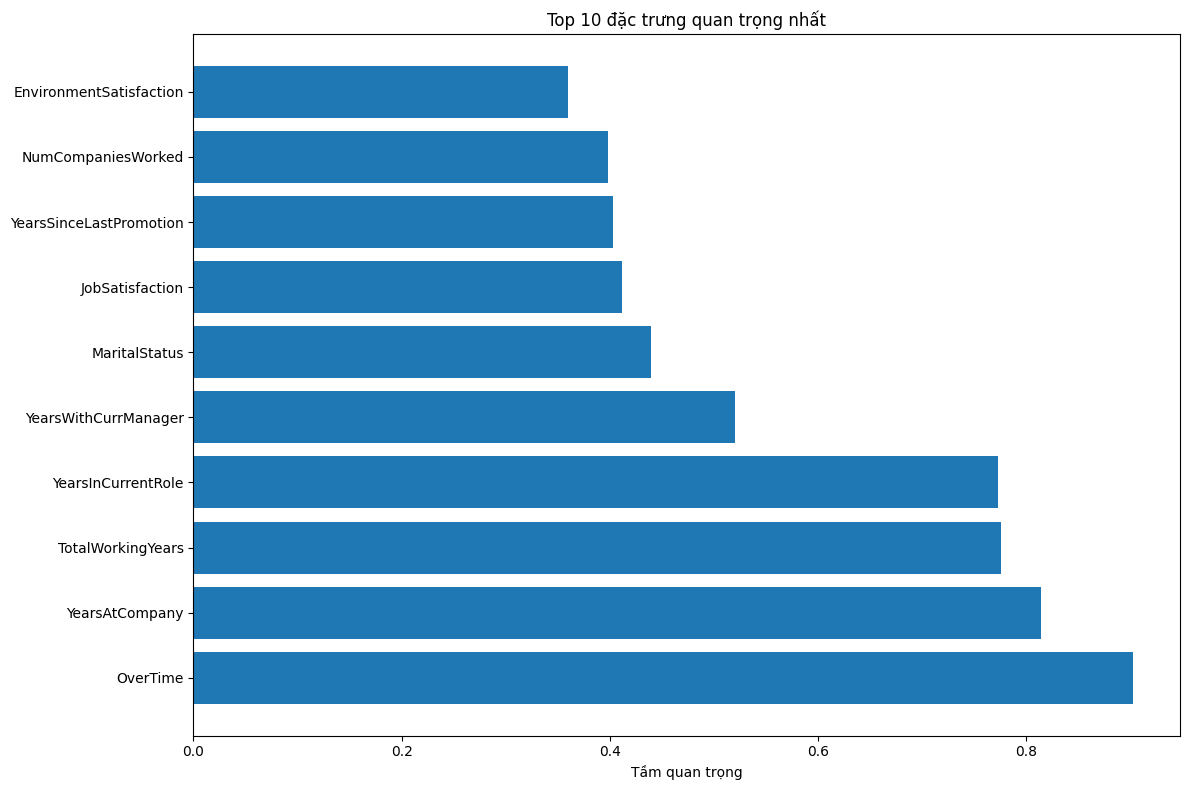

In [16]:
# Phân tích tầm quan trọng của đặc trưng
print("\n=== PHÂN TÍCH TẦM QUAN TRỌNG CỦA ĐẶC TRƯNG ===")
# Lấy và sắp xếp các đặc trưng theo tầm quan trọng
feature_importance = pd.DataFrame({
    'Đặc trưng': X_train_balanced.columns,
    'Tầm quan trọng': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Tầm quan trọng', ascending=False)

# Hiển thị top 10 đặc trưng quan trọng nhất
print("\nTop 10 đặc trưng quan trọng nhất:")
print(feature_importance.head(10))

plt.figure(figsize=(12, 8))
top_features = feature_importance.head(10)
plt.barh(top_features['Đặc trưng'], top_features['Tầm quan trọng'])
plt.title('Top 10 đặc trưng quan trọng nhất')
plt.xlabel('Tầm quan trọng')
plt.tight_layout()
plt.show()

### Huấn luyện mô hình với GridSeachCV

In [17]:
import time

print("\n=== TÌM KIẾM THAM SỐ TỐI ƯU ===")
# Định nghĩa các tham số cần tìm kiếm
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [1000, 2000, 3000]
}

# Khởi tạo mô hình cơ bản
base_model = LogisticRegression(random_state=42)

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Thực hiện tìm kiếm
print("Đang tìm kiếm tham số tối ưu...")
start_time = time.time()
grid_search.fit(X_train_balanced, y_train_balanced)
end_time = time.time()
training_time = end_time - start_time

# In kết quả tìm kiếm
print("\nTham số tốt nhất:", grid_search.best_params_)
print("Điểm tốt nhất:", grid_search.best_score_)

print("Tham số tối ưu của mô hình:")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

# Huấn luyện mô hình với tham số tối ưu
model = grid_search.best_estimator_
model.fit(X_train_balanced, y_train_balanced)

# Dự đoán và đánh giá
print("\n=== ĐÁNH GIÁ MÔ HÌNH ===")
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Thời gian huấn luyện GridSearchCV: {training_time:.4f} s")
print(classification_report(y_test, y_pred))


=== TÌM KIẾM THAM SỐ TỐI ƯU ===
Đang tìm kiếm tham số tối ưu...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Tham số tốt nhất: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Điểm tốt nhất: 0.7887210790366679
Tham số tối ưu của mô hình:
C: 0.01
max_iter: 1000
penalty: l2
solver: liblinear

=== ĐÁNH GIÁ MÔ HÌNH ===
Accuracy: 0.6871
Thời gian huấn luyện GridSearchCV: 6.5810 s
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       255
           1       0.24      0.64      0.35        39

    accuracy                           0.69       294
   macro avg       0.58      0.67      0.57       294
weighted avg       0.84      0.69      0.74       294



#### Thực tế và Dự đoán


=== SO SÁNH GIÁ TRỊ THỰC TẾ VÀ DỰ ĐOÁN ===
Số lượng dự đoán đúng: 202
Số lượng dự đoán sai: 92


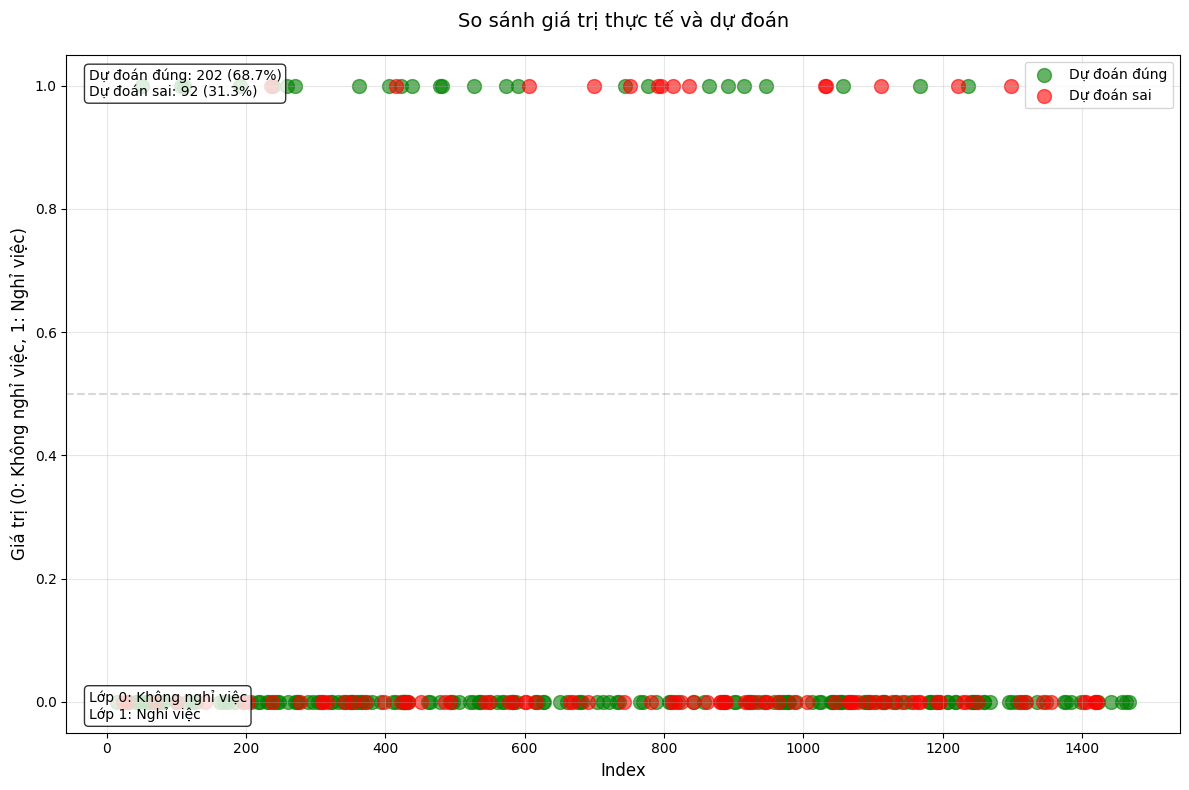

In [18]:
# So sánh giá trị thực tế và dự đoán
print("\n=== SO SÁNH GIÁ TRỊ THỰC TẾ VÀ DỰ ĐOÁN ===")
# Tạo DataFrame chứa giá trị thực tế và dự đoán
y_compare = pd.DataFrame({
    'Thực tế': y_test,
    'Dự đoán': y_pred,
})

# Thêm cột để đánh dấu dự đoán đúng/sai
y_compare['Dự đoán đúng'] = y_compare['Thực tế'] == y_compare['Dự đoán']

# Hiển thị số lượng dự đoán đúng và sai
correct_count = sum(y_compare['Dự đoán đúng'])
incorrect_count = sum(~y_compare['Dự đoán đúng'])
print(f"Số lượng dự đoán đúng: {correct_count}")
print(f"Số lượng dự đoán sai: {incorrect_count}")

# Vẽ biểu đồ phân tán
plt.figure(figsize=(12, 8))

# Vẽ các điểm dự đoán đúng (màu xanh)
plt.scatter(y_compare[y_compare['Dự đoán đúng']].index,
           y_compare[y_compare['Dự đoán đúng']]['Thực tế'],
           color='green', alpha=0.6, label='Dự đoán đúng', s=100)

# Vẽ các điểm dự đoán sai (màu đỏ)
plt.scatter(y_compare[~y_compare['Dự đoán đúng']].index,
           y_compare[~y_compare['Dự đoán đúng']]['Thực tế'],
           color='red', alpha=0.6, label='Dự đoán sai', s=100)

# Thêm đường ngang để phân biệt các lớp
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.3)

plt.title('So sánh giá trị thực tế và dự đoán', fontsize=14, pad=20)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Giá trị (0: Không nghỉ việc, 1: Nghỉ việc)', fontsize=12)
plt.legend(fontsize=10)

# Thêm chú thích về số lượng và tỷ lệ
total = correct_count + incorrect_count
accuracy = correct_count / total * 100
plt.text(0.02, 0.98,
         f'Dự đoán đúng: {correct_count} ({accuracy:.1f}%)\n'
         f'Dự đoán sai: {incorrect_count} ({100-accuracy:.1f}%)',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
         fontsize=10)

# Thêm chú thích về các lớp
plt.text(0.02, 0.02,
         'Lớp 0: Không nghỉ việc\nLớp 1: Nghỉ việc',
         transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
         fontsize=10)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Confusion Matrix - GridSeachCV


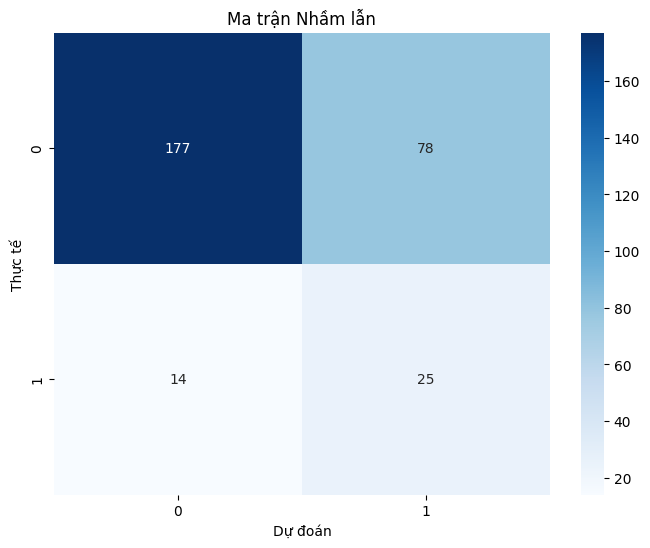

In [19]:
# Confusion Matrix - GridSeachCV
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Ma trận Nhầm lẫn')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

#### ROC Curve

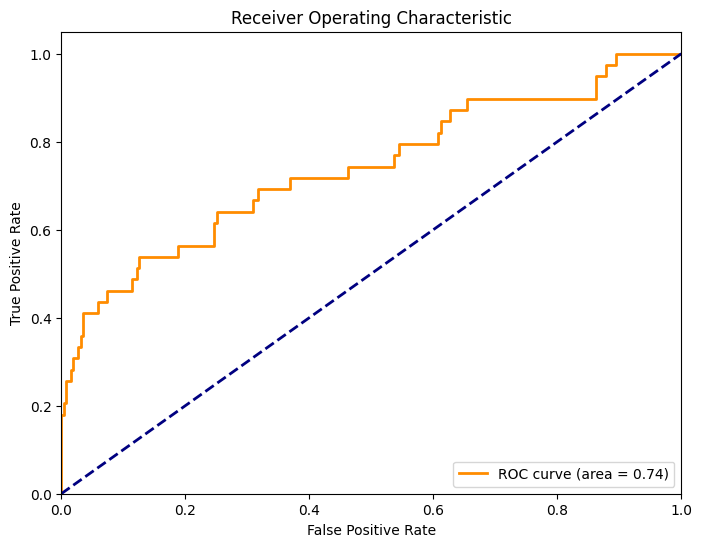

In [20]:
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Tính toán FPR, TPR và thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Tính toán AUC
roc_auc = auc(fpr, tpr)

# Vẽ đường ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### Đặc trưng quan trọng


=== PHÂN TÍCH TẦM QUAN TRỌNG CỦA ĐẶC TRƯNG ===

Top 10 đặc trưng quan trọng nhất:
                  Đặc trưng  Tầm quan trọng
12                 OverTime        0.609341
10            MaritalStatus        0.294238
17        TotalWorkingYears        0.290469
21       YearsInCurrentRole        0.287838
9           JobSatisfaction        0.248953
16         StockOptionLevel        0.248675
7            JobInvolvement        0.230137
6   EnvironmentSatisfaction        0.215993
11       NumCompaniesWorked        0.205234
0                       Age        0.188381


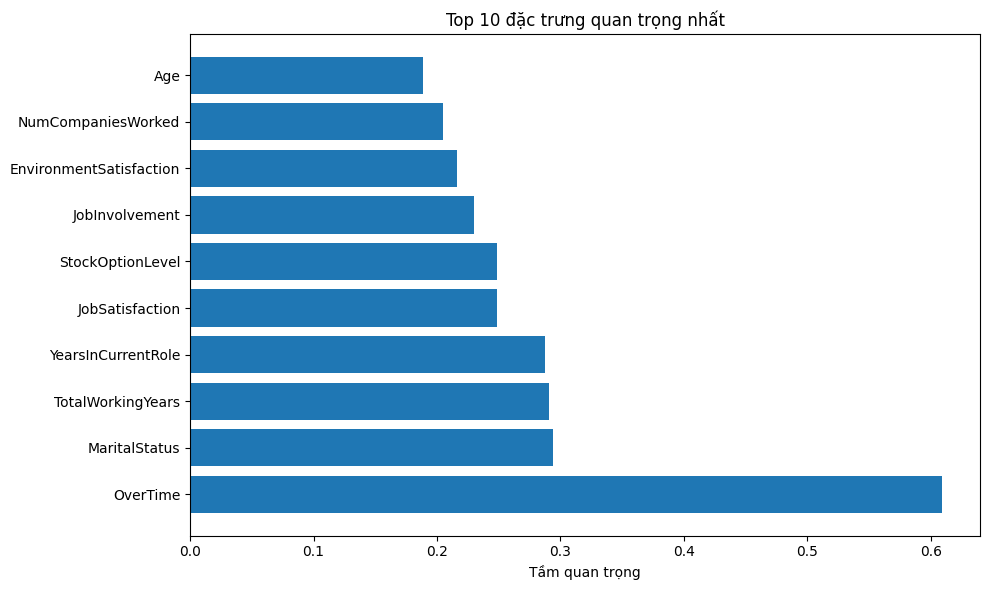

In [21]:
# Phân tích tầm quan trọng của đặc trưng
print("\n=== PHÂN TÍCH TẦM QUAN TRỌNG CỦA ĐẶC TRƯNG ===")
# Lấy và sắp xếp các đặc trưng theo tầm quan trọng
feature_importance = pd.DataFrame({
    'Đặc trưng': X_train_balanced.columns,
    'Tầm quan trọng': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Tầm quan trọng', ascending=False)

# Hiển thị top 10 đặc trưng quan trọng nhất
print("\nTop 10 đặc trưng quan trọng nhất:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(top_features['Đặc trưng'], top_features['Tầm quan trọng'])
plt.title('Top 10 đặc trưng quan trọng nhất')
plt.xlabel('Tầm quan trọng')
plt.tight_layout()
plt.show()



#### **Giải thích Công thức trong Logistic Regression**

##### **1. Hàm Sigmoid**
Hàm sigmoid là hàm kích hoạt được sử dụng trong Logistic Regression để chuyển đổi đầu ra thành một giá trị xác suất trong khoảng \( (0,1) \):

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Trong đó:
- \( z = \theta^T X \) là tích vô hướng giữa vector trọng số \( \theta \) và vector đặc trưng \( X \).
- \( e \) là hằng số Euler.

Hàm sigmoid đảm bảo đầu ra của mô hình luôn nằm trong khoảng [0,1], giúp biểu diễn xác suất xảy ra của một sự kiện.

---

##### **2. Hàm Mất Mát (Log Loss)**
Hàm mất mát thường được sử dụng là **Binary Cross-Entropy Loss**, còn gọi là Log Loss:

$$
J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

Trong đó:
- \( y^{(i)} \): Giá trị thực tế của mẫu thứ \( i \) (0 hoặc 1).
- \( \hat{y}^{(i)} = \sigma(\theta^T X) \): Giá trị dự đoán từ mô hình.
- \( m \): Số lượng mẫu.

---

##### **3. Gradient Descent (Thuật toán tối ưu)**
Gradient Descent được sử dụng để tìm giá trị tối ưu của các trọng số \( \theta \):

$$
\theta_j := \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) x_j^{(i)}
$$

Trong đó:
- \( \alpha \): Tốc độ học (learning rate).
- \( \hat{y}^{(i)} - y^{(i)} \): Sai số giữa dự đoán và giá trị thực tế.
- \( x_j^{(i)} \): Giá trị của đặc trưng \( j \) của mẫu \( i \).

---

##### **4. Regularization (Chuẩn hóa)**
Regularization giúp giảm overfitting bằng cách thêm vào hàm mất mát một thuật ngữ phạt:

###### **L2 Regularization (Ridge Regression)**
$$
J(\theta) = J_{LogLoss} + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2
$$

###### **L1 Regularization (Lasso Regression)**
$$
J(\theta) = J_{LogLoss} + \frac{\lambda}{m} \sum_{j=1}^{n} |\theta_j|
$$

Trong đó:
- \( \lambda \): Hệ số điều chỉnh mức độ regularization.
- **L2** giảm độ lớn của các trọng số (làm mượt mô hình).
- **L1** loại bỏ các trọng số nhỏ (chọn lọc đặc trưng tốt hơn).

---

#### **5. Xác suất và Ngưỡng Phân Loại**
Logistic Regression sử dụng hàm sigmoid để dự đoán xác suất và áp dụng ngưỡng phân loại \( t \) để xác định nhãn:

$$
\hat{y} =
\begin{cases}
1, & \text{nếu } \sigma(\theta^T X) \geq t \\
0, & \text{nếu } \sigma(\theta^T X) < t
\end{cases}
$$

## ***Đánh giá và Kết luận***  


### **Tổng quan về dự án**

Dự án tập trung vào xây dựng và so sánh hiệu suất của hai mô hình **Logistic Regression** nhằm dự đoán khả năng một nhân viên rời bỏ công ty (*Attrition*). Bằng cách khai thác dữ liệu nhân sự, mô hình giúp xác định các yếu tố ảnh hưởng đến sự nghỉ việc, từ đó hỗ trợ doanh nghiệp quản lý nhân sự hiệu quả hơn.


#### **1. Kết quả đạt được**

#### Hiệu suất mô hình

| Chỉ số        | Mô hình cơ bản  | Mô hình GridSearchCV |
|---------------|-----------------|----------------------|
| Accuracy      | 72.11%         | 68.71%              |
| Precision     | 26%            | 24%                 |
| Recall        | 59%            | 64%                 |
| F1-Score      | 36%            | 35%                 |
| Thời gian huấn luyện | 0.0223s   | 6.5810 s              |

#### Tham số tối ưu từ GridSearchCV:
- **C**: 0.01
- **max_iter**: 1000
- **penalty**: l2
- **solver**: liblinear

#### Đặc trưng quan trọng nhất
- **Mô hình cơ bản**: OverTime, YearsAtCompany, TotalWorkingYears, YearsInCurrentRole, YearsWithCurrManager.
- **Mô hình GridSearchCV**: OverTime, MaritalStatus, TotalWorkingYears, YearsInCurrentRole, JobSatisfaction.

#### **2. Hạn chế và hướng phát triển**

#### Hạn chế:
- Mô hình cơ bản có độ chính xác cao nhưng khả năng phát hiện các trường hợp nghỉ việc (Recall) chưa tối ưu.
- GridSearchCV mất nhiều thời gian huấn luyện hơn.

#### Hướng phát triển:
- Thử nghiệm các phương pháp xử lý dữ liệu mất cân bằng như SMOTE.
- Mở rộng tập đặc trưng để tăng khả năng dự đoán.
- Áp dụng thêm các thuật toán khác như Random Forest hoặc Gradient Boosting để so sánh hiệu suất.

### **Kết luận**  
Dự án đã cho thấy hiệu quả của việc sử dụng mô hình Logistic Regression trong việc dự đoán khả năng nghỉ việc của nhân viên. Mô hình cơ bản đạt độ chính xác cao hơn và thời gian huấn luyện nhanh hơn, phù hợp để sử dụng trong các tình huống yêu cầu phản hồi nhanh và độ chính xác tổng thể tốt. Trong khi đó, mô hình được tối ưu tham số bằng GridSearchCV cho kết quả tốt hơn về khả năng phát hiện các trường hợp nghỉ việc, nhờ điểm Recall cao hơn, dù thời gian huấn luyện lâu hơn. Những kết quả này nhấn mạnh tầm quan trọng của việc cân bằng giữa độ chính xác tổng thể và hiệu suất của từng lớp, đặc biệt là lớp có số liệu ít hơn. Dựa trên những kết quả đạt được, cần tiếp tục thử nghiệm các phương pháp khác như xử lý dữ liệu mất cân bằng, mở rộng tập dữ liệu, và áp dụng các thuật toán tiên tiến hơn để cải thiện hiệu suất dự đoán trong tương lai.
